<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p> 
<p><font size="5" color='grey'> <b>
Partial - MLPClassifier - Bank Marketing Campaigns 
</b></font> </br></p> 

---


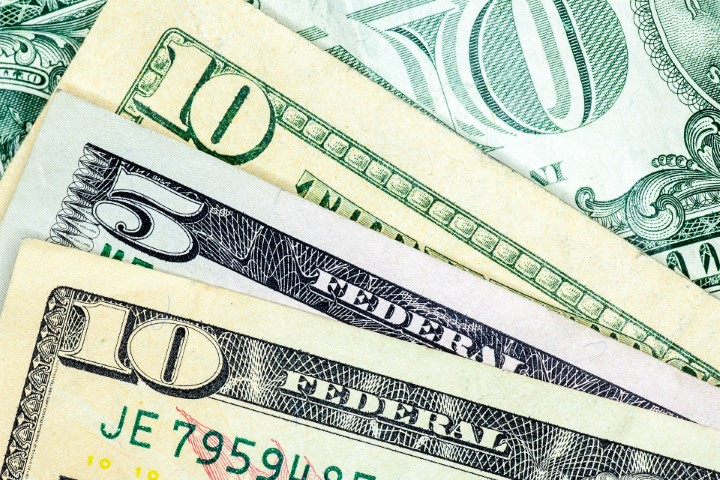

Bild von <a href="https://pixabay.com/de/users/roamingpro-1398292/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=963191">Jerry Nettik</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=963191">Pixabay</a>

# **1 <font color='orange'>|</font> Understand**
***


<p><font color='black' size="5">
Warnungen ausstellen
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>

---   

Bankmarketingkampagnen zur Eröffnung einer Termineinlage. 
Es handelt sich um einen Datensatz, der die Ergebnisse der Marketingkampagnen der portugiesischen Banken beschreibt.
Durchgeführte Kampagnen basierten hauptsächlich auf direkten Telefonanrufen, bei denen Bankkunden angeboten wurden, eine Termineinlage zu tätigen. Wenn der Kunde nach allen Markierungsbemühungen der Hinterlegung zugestimmt hat - Zielvariable mit "Ja" markiert, andernfalls mit "Nein".


[DataSet](https://www.openml.org/search?type=data&status=active&id=1461)

[Info](https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset)

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_openml
df = fetch_openml(data_id=1461)


<p><font color='black' size="5">
Anpassen der Fearture-Names
</font></p>

In [ ]:
new_names = ['Age', 'Job', 'Martial', 'Education', 'Credit', 'Balance', 'Housing',
       'Loan', 'Contact via', 'Day last contact', 'Month last contact',
       'Duration', 'Campaign#', 'Days passed', '# of contacts before',
       'Previous campaign', 'Class']

In [ ]:
df.frame.columns = new_names

In [ ]:
data = df.frame
data['class'] = df.target

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Pandas
</font></p>

In [ ]:
data.info()

In [ ]:
data.describe().T

# **2 <font color='orange'>|</font>  Prepare**

---

<p><font color='black' size="5">
Löschen nicht benötigter Merkmale
</font></p>



In [ ]:
data.drop(['Duration'],axis=1, inplace=True)

<p><font color='black' size="5">
Ersetzen Code für Target in 'sprechende' Ausprägung
</font></p>

In [ ]:
data['class'].replace(['1', '2'], ['No', 'Yes'], inplace=True)
target = data['class']

<p><font color='black' size="5">
Ersetzen kategoriale Merkmale durch definierte numerische Merkmale
</font></p>

In [ ]:
replace_dic = {'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3}
data.Education.replace(replace_dic,inplace=True)
data['Education'] = data['Education'].astype('int')

<p><font color='black' size="5">
Datentyp ermitteln
</font></p>


In [ ]:
all_col = data.columns
num_col = data.select_dtypes(include='number').columns
cat_col = data.select_dtypes(exclude='number').columns

<p><font color='black' size="5">
Codierung
</font></p>

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
data[cat_col] = OrdinalEncoder().fit_transform(data[cat_col])                   

<p><font color='black' size="5">
Skalierung
</font></p>

In [ ]:
from sklearn.preprocessing import  MinMaxScaler
data[num_col] = MinMaxScaler().fit_transform(data[num_col])

<p><font color='black' size="5">
Missing Data
</font></p>

In [ ]:
data.isnull().sum()

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
data = pd.DataFrame(SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(data), columns=data.columns)

# **3 <font color='orange'>|</font> Modeling**
---

 <p><font color='black' size="5">
Modellauswahl
</font></p>

In [ ]:

from sklearn import set_config
set_config(display='diagram')

In [ ]:
from sklearn.neural_network import MLPClassifier
model2 = MLPClassifier(verbose=1, random_state=42)
model10 = MLPClassifier(verbose=1, random_state=42)

In [ ]:
model2

In [ ]:
model10

In [ ]:
#@title 
#@markdown <p><font size="5" color='grey'> <b> Alternative: 2 Trainingsläufe mit jeweils 50% der Daten</b></font> </br></p> 

import numpy as np
from sklearn.model_selection import train_test_split
data_part1, data_part2, target_part1, target_part2 = train_test_split(data, target, test_size=0.5, random_state=42)
data_part1.shape, data_part2.shape, target_part1.shape, target_part2.shape

model2.partial_fit(data_part1, target_part1, np.unique(target))
model2.score(data_part1, target_part1)

model2.partial_fit(data_part2, target_part2)
model2.score(data_part2, target_part2)

In [ ]:
#@title 
#@markdown <p><font size="5" color='grey'> <b> Alternative: 10 Trainingsläufe mit jeweils 10% der Daten</b></font> </br></p> 
import numpy as np
for i in range(1,11):
  data_rows = data.sample(frac =.10, replace=False, random_state=42)
  target_rows = data_rows['class']
  data_rows.drop(['class'], inplace = True, axis=1)
  model10.partial_fit(data_rows, target_rows, np.unique(target))
  print("Part ",i, model10.score(data_rows, target_rows))

# **4 <font color='orange'>|</font> Evaluate**
---

<p><font color='black' size="5">
Accuracy
</font></p>

In [ ]:
# 2 Trainingsläufe
acc_part1 = model2.score(data_part1, target_part1) * 100
print (f'Modell: {model2} -- Train -- Accuracy: {acc_part1:5.2f}%')

target_pred = model2.predict(data_part2)
acc_part2 = model2.score(data_part2, target_part2) * 100
print (f'Modell: {model2} -- Test -- Accuracy: {acc_part2:5.2f}%')


<p><font color='black' size="5">
Confusion Matrix
</font></p>

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
conf_matrix = confusion_matrix(target_part2, target_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No','Yes']) 
disp.plot(cmap='Blues')

In [ ]:
print(classification_report(target_part2, target_pred, target_names=['No','Yes']))

In [ ]:
# 10 Trainingsläufe
data.drop(['class'], inplace = True, axis=1)
model10.score(data, target)


<p><font color='black' size="5">
Vergleichswert: Training mit allen Daten
</font></p>


In [ ]:
model_all = MLPClassifier(verbose=1, random_state=42)
model_all.fit(data, target)
model_all.score(data, target)
target_pred = model_all.predict(data)


<p><font color='black' size="5">
Confusion Matrix
</font></p>

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
conf_matrix = confusion_matrix(target, target_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No','Yes']) 
disp.plot(cmap='Blues')
print(classification_report(target, target_pred, target_names=['No','Yes']))

# **5 <font color='orange'>|</font> Deploy**
---